In [1]:
import numpy as numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Set pandas to read all columns and lines
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
df_train = pd.read_csv('../data//Train/train_home_team_statistics_df.csv')
Y_train = pd.read_csv('../data/Train/Y_train_1rknArQ.csv')

In [4]:
df.head()

NameError: name 'df' is not defined

In [6]:
pd.DataFrame(df_train.dtypes.reset_index())

,index,0
0,ID,int64
1,LEAGUE,object
2,TEAM_NAME,object
3,TEAM_SHOTS_TOTAL_season_sum,float64
4,TEAM_SHOTS_INSIDEBOX_season_sum,float64
5,TEAM_SHOTS_OFF_TARGET_season_sum,float64
6,TEAM_SHOTS_ON_TARGET_season_sum,float64
7,TEAM_SHOTS_OUTSIDEBOX_season_sum,float64
8,TEAM_PASSES_season_sum,float64
9,TEAM_SUCCESSFUL_PASSES_season_sum,float64


Ok donc on a un certain nombre de données, avec à chaque fois des données sur toute la saison et sur les 5 derniers matchs, et à chaque fois la moyenne, la somme et la standard variation.

Tout a l'air d'être bien en float.  
Par contre il semble qu'on ait pas la date des matchs (donnée externe interdite).

Visiblement la target est dans l'ensemble de sortie donc essayons de faire un merge.

In [7]:
Y_train.head()

,ID,HOME_WINS,DRAW,AWAY_WINS
0,0,0,0,1
1,1,0,1,0
2,2,0,0,1
3,3,1,0,0
4,4,0,1,0


In [8]:
Y_train.shape[0] == df_train.shape[0]

True

In [9]:
# Let us proceed with the merge of df_train and Y_train
df_train = pd.merge(df_train, Y_train, on='ID', how='inner')

In [10]:
df_train.head()

,ID,LEAGUE,TEAM_NAME,TEAM_SHOTS_TOTAL_season_sum,TEAM_SHOTS_INSIDEBOX_season_sum,TEAM_SHOTS_OFF_TARGET_season_sum,TEAM_SHOTS_ON_TARGET_season_sum,TEAM_SHOTS_OUTSIDEBOX_season_sum,TEAM_PASSES_season_sum,TEAM_SUCCESSFUL_PASSES_season_sum,TEAM_SAVES_season_sum,TEAM_CORNERS_season_sum,TEAM_FOULS_season_sum,TEAM_YELLOWCARDS_season_sum,TEAM_REDCARDS_season_sum,TEAM_OFFSIDES_season_sum,TEAM_ATTACKS_season_sum,TEAM_PENALTIES_season_sum,TEAM_SUBSTITUTIONS_season_sum,TEAM_BALL_SAFE_season_sum,TEAM_DANGEROUS_ATTACKS_season_sum,TEAM_INJURIES_season_sum,TEAM_GOALS_season_sum,TEAM_GAME_WON_season_sum,TEAM_GAME_DRAW_season_sum,TEAM_GAME_LOST_season_sum,TEAM_SHOTS_TOTAL_season_average,TEAM_SHOTS_INSIDEBOX_season_average,TEAM_SHOTS_OFF_TARGET_season_average,TEAM_SHOTS_ON_TARGET_season_average,TEAM_SHOTS_OUTSIDEBOX_season_average,TEAM_PASSES_season_average,TEAM_SUCCESSFUL_PASSES_season_average,TEAM_SUCCESSFUL_PASSES_PERCENTAGE_season_average,TEAM_SAVES_season_average,TEAM_CORNERS_season_average,TEAM_BALL_POSSESSION_season_average,TEAM_FOULS_season_average,TEAM_YELLOWCARDS_season_average,TEAM_REDCARDS_season_average,TEAM_OFFSIDES_season_average,TEAM_ATTACKS_season_average,TEAM_PENALTIES_season_average,TEAM_SUBSTITUTIONS_season_average,TEAM_BALL_SAFE_season_average,TEAM_DANGEROUS_ATTACKS_season_average,TEAM_INJURIES_season_average,TEAM_GOALS_season_average,TEAM_GAME_WON_season_average,TEAM_GAME_DRAW_season_average,TEAM_GAME_LOST_season_average,TEAM_SHOTS_TOTAL_season_std,TEAM_SHOTS_INSIDEBOX_season_std,TEAM_SHOTS_OFF_TARGET_season_std,TEAM_SHOTS_ON_TARGET_season_std,TEAM_SHOTS_OUTSIDEBOX_season_std,TEAM_PASSES_season_std,TEAM_SUCCESSFUL_PASSES_season_std,TEAM_SUCCESSFUL_PASSES_PERCENTAGE_season_std,TEAM_SAVES_season_std,TEAM_CORNERS_season_std,TEAM_BALL_POSSESSION_season_std,TEAM_FOULS_season_std,TEAM_YELLOWCARDS_season_std,TEAM_REDCARDS_season_std,TEAM_OFFSIDES_season_std,TEAM_ATTACKS_season_std,TEAM_PENALTIES_season_std,TEAM_SUBSTITUTIONS_season_std,TEAM_BALL_SAFE_season_std,TEAM_DANGEROUS_ATTACKS_season_std,TEAM_INJURIES_season_std,TEAM_GOALS_season_std,TEAM_SHOTS_TOTAL_5_last_match_sum,TEAM_SHOTS_INSIDEBOX_5_last_match_sum,TEAM_SHOTS_OFF_TARGET_5_last_match_sum,TEAM_SHOTS_ON_TARGET_5_last_match_sum,TEAM_SHOTS_OUTSIDEBOX_5_last_match_sum,TEAM_PASSES_5_last_match_sum,TEAM_SUCCESSFUL_PASSES_5_last_match_sum,TEAM_SAVES_5_last_match_sum,TEAM_CORNERS_5_last_match_sum,TEAM_FOULS_5_last_match_sum,TEAM_YELLOWCARDS_5_last_match_sum,TEAM_REDCARDS_5_last_match_sum,TEAM_OFFSIDES_5_last_match_sum,TEAM_ATTACKS_5_last_match_sum,TEAM_PENALTIES_5_last_match_sum,TEAM_SUBSTITUTIONS_5_last_match_sum,TEAM_BALL_SAFE_5_last_match_sum,TEAM_DANGEROUS_ATTACKS_5_last_match_sum,TEAM_INJURIES_5_last_match_sum,TEAM_GOALS_5_last_match_sum,TEAM_GAME_WON_5_last_match_sum,TEAM_GAME_DRAW_5_last_match_sum,TEAM_GAME_LOST_5_last_match_sum,TEAM_SHOTS_TOTAL_5_last_match_average,TEAM_SHOTS_INSIDEBOX_5_last_match_average,TEAM_SHOTS_OFF_TARGET_5_last_match_average,TEAM_SHOTS_ON_TARGET_5_last_match_average,TEAM_SHOTS_OUTSIDEBOX_5_last_match_average,TEAM_PASSES_5_last_match_average,TEAM_SUCCESSFUL_PASSES_5_last_match_average,TEAM_SUCCESSFUL_PASSES_PERCENTAGE_5_last_match_average,TEAM_SAVES_5_last_match_average,TEAM_CORNERS_5_last_match_average,TEAM_BALL_POSSESSION_5_last_match_average,TEAM_FOULS_5_last_match_average,TEAM_YELLOWCARDS_5_last_match_average,TEAM_REDCARDS_5_last_match_average,TEAM_OFFSIDES_5_last_match_average,TEAM_ATTACKS_5_last_match_average,TEAM_PENALTIES_5_last_match_average,TEAM_SUBSTITUTIONS_5_last_match_average,TEAM_BALL_SAFE_5_last_match_average,TEAM_DANGEROUS_ATTACKS_5_last_match_average,TEAM_INJURIES_5_last_match_average,TEAM_GOALS_5_last_match_average,TEAM_GAME_WON_5_last_match_average,TEAM_GAME_DRAW_5_last_match_average,TEAM_GAME_LOST_5_last_match_average,TEAM_SHOTS_TOTAL_5_last_match_std,TEAM_SHOTS_INSIDEBOX_5_last_match_std,TEAM_SHOTS_OFF_TARGET_5_last_match_std,TEAM_SHOTS_ON_TARGET_5_last_match_std,TEAM_SHOTS_OUTSIDEBOX_5_last_match_std,TEAM_PASSES_5_last_match

In [12]:
# Let us check the balance between the different outcomes
print(f"""The part of the games that ended in a home win is {100*df_train['HOME_WINS'].sum()/df_train.shape[0]:.2f}%""")
print(f"""The part of the games that ended in a draw is {100*df_train['DRAW'].sum()/df_train.shape[0]:.2f}%""")
print(f"""The part of the games that ended in an away win is {100*df_train['AWAY_WINS'].sum()/df_train.shape[0]:.2f}%""")

The part of the games that ended in a home win is 43.53%
The part of the games that ended in a draw is 25.90%
The part of the games that ended in an away win is 30.57%


Ok donc on va avoir un problème d'unbalance data pour plus tard.

Et il faudrait voir si dans le test set c'est la même chose.

### Etude des correlations

#### Sur les Home wins

In [23]:
# Restrict the df to columns that end with average
df_train_avg = df_train.loc[:, df_train.columns.str.endswith('average')]

# Check the correlations with column 'HOME_WINS'
correlations_home = df_train_avg.corrwith(df_train['HOME_WINS']).sort_values(ascending=False)

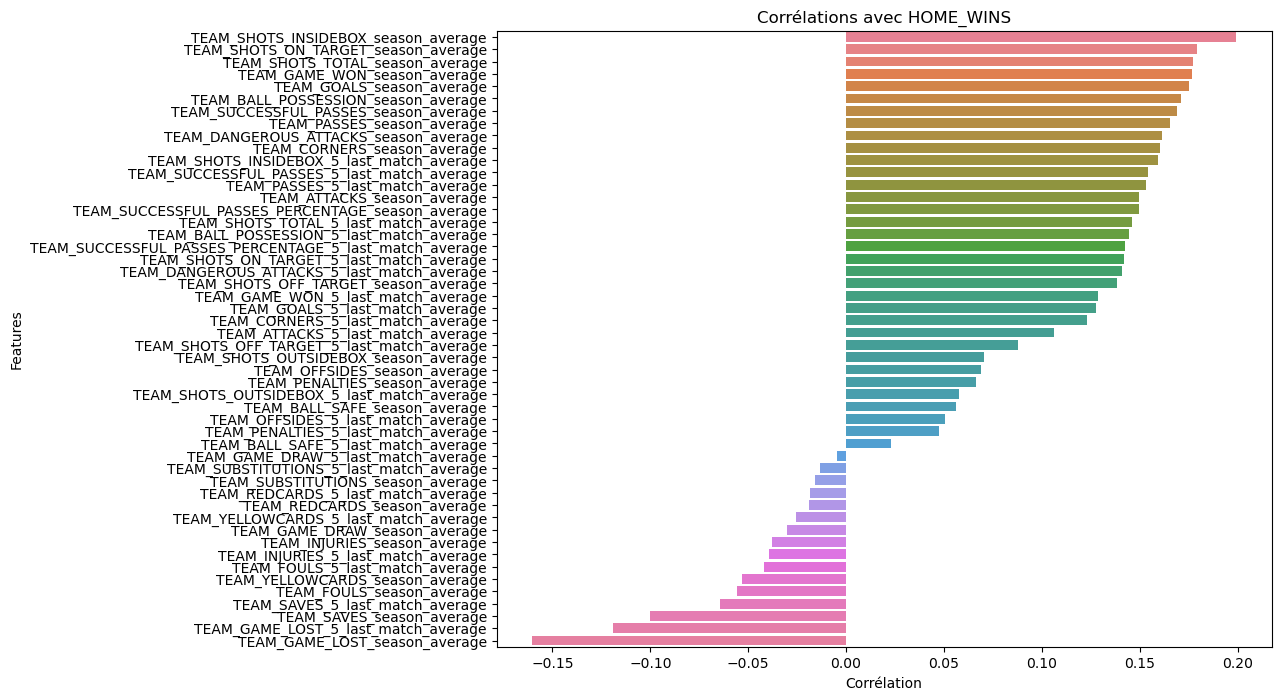

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.barplot(x=correlations_home.values, y=correlations_home.index, hue=correlations_home.index, legend=False)
plt.title("Corrélations avec HOME_WINS")
plt.xlabel("Corrélation")
plt.ylabel("Features")
plt.show()


Faudrait aussi checker sum et std et regarder les correlations des features entre elles.

In [ ]:
# Create a column that ranks the correlation on absolute value
correlations_home = pd.DataFrame(correlations_home).reset_index()
correlations_home.columns = ['Feature', 'Correlation']
correlations_home['Correlation_abs'] = correlations_home['Correlation'].abs()
correlations_home['rank_abs'] = correlations_home['Correlation_abs'].rank(ascending=False)

#### Sur les Away wins

In [25]:
# Restrict the df to columns that end with average
df_train_avg = df_train.loc[:, df_train.columns.str.endswith('average')]

# Check the correlations with column 'HOME_WINS'
correlations_away = df_train_avg.corrwith(df_train['AWAY_WINS']).sort_values(ascending=False)

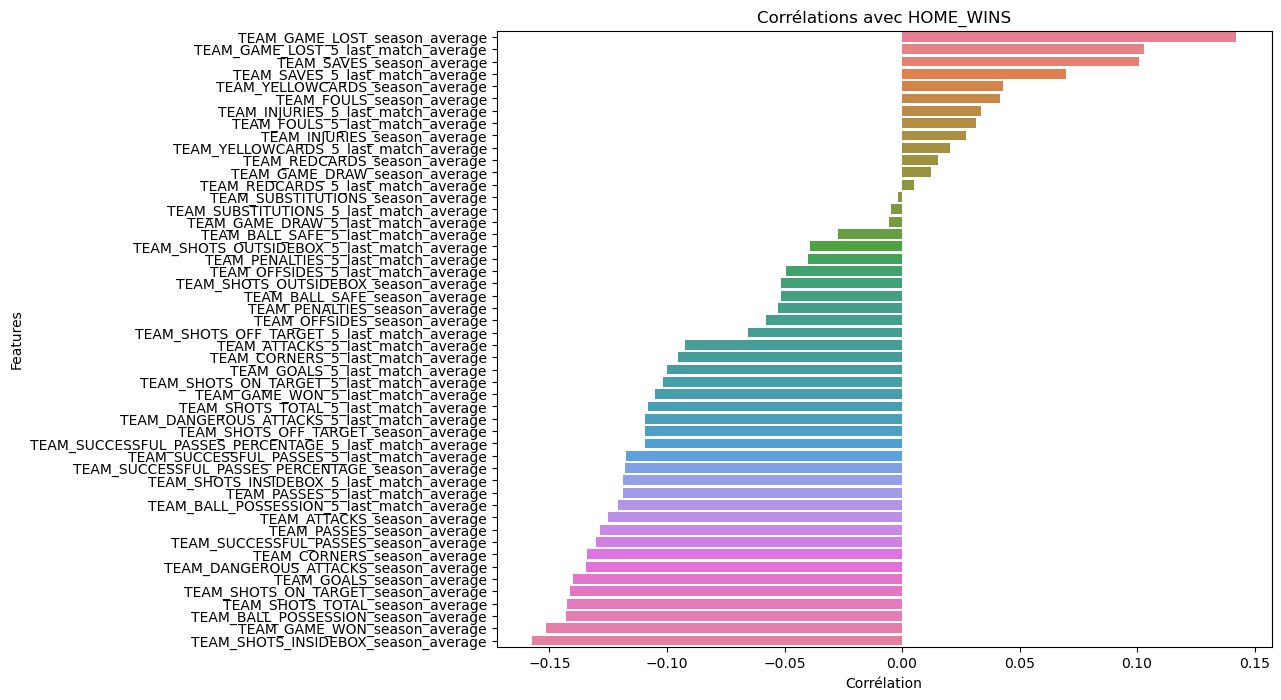

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.barplot(x=correlations_draw.values, y=correlations_draw.index, hue=correlations_draw.index, legend=False)
plt.title("Corrélations avec HOME_WINS")
plt.xlabel("Corrélation")
plt.ylabel("Features")
plt.show()


In [30]:
# Create a column that ranks the correlation on absolute value
correlations_away = pd.DataFrame(correlations_away).reset_index()
correlations_away.columns = ['Feature', 'Correlation']
correlations_away['Correlation_abs'] = correlations_away['Correlation'].abs()
correlations_away['rank_abs'] = correlations_away['Correlation_abs'].rank(ascending=False)

#### Sur les draw

In [31]:
# Restrict the df to columns that end with average
df_train_avg = df_train.loc[:, df_train.columns.str.endswith('average')]

# Check the correlations with column 'HOME_WINS'
correlations_draw = df_train_avg.corrwith(df_train['DRAW']).sort_values(ascending=False)

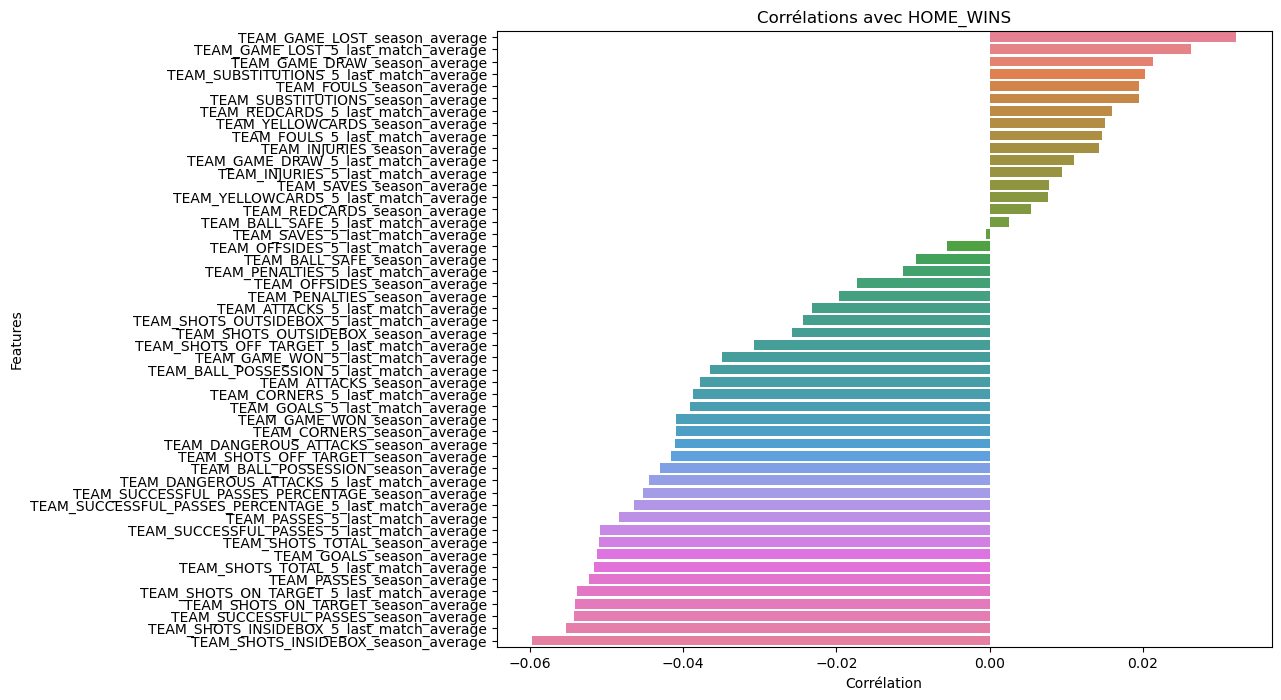

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.barplot(x=correlations_draw.values, y=correlations_draw.index, hue=correlations_draw.index, legend=False)
plt.title("Corrélations avec HOME_WINS")
plt.xlabel("Corrélation")
plt.ylabel("Features")
plt.show()


Les correlations sont beaucoup moins élevées que pour les victoires/défaites.

In [33]:
# Create a column that ranks the correlation on absolute value
correlations_draw = pd.DataFrame(correlations_draw).reset_index()
correlations_draw.columns = ['Feature', 'Correlation']
correlations_draw['Correlation_abs'] = correlations_draw['Correlation'].abs()
correlations_draw['rank_abs'] = correlations_draw['Correlation_abs'].rank(ascending=False)

### Merge the 3 correlations df

In [44]:
# Merge the three dataframes
df_correlations = pd.merge(correlations_home, correlations_away, on='Feature', how='inner', suffixes=('_home', '_away'))	
df_correlations = pd.merge(df_correlations, correlations_draw, on='Feature', how='inner', suffixes=('', '_draw'))

In [50]:
# Set the rank columns at the beginning
df_correlations = df_correlations[['Feature', 'rank_abs_home', 'rank_abs_away', 'rank_abs', 'Correlation_home', 'Correlation_away', 'Correlation']] 

In [51]:
df_correlations

,Feature,rank_abs_home,rank_abs_away,rank_abs,Correlation_home,Correlation_away,Correlation
0,TEAM_SHOTS_INSIDEBOX_season_average,1.0,1.0,1.0,0.199278,-0.157530,-0.059728
1,TEAM_SHOTS_ON_TARGET_season_average,2.0,6.0,4.0,0.179163,-0.141369,-0.054113
2,TEAM_SHOTS_TOTAL_season_average,3.0,4.0,9.0,0.177302,-0.142451,-0.050957
3,TEAM_GAME_WON_season_average,4.0,2.0,19.0,0.176881,-0.151447,-0.040872
4,TEAM_GOALS_season_average,5.0,7.0,8.0,0.175196,-0.139828,-0.051214
5,TEAM_BALL_POSSESSION_season_average,6.0,3.0,15.0,0.170843,-0.142933,-0.043042
6,TEAM_SUCCESSFUL_PASSES_season_average,7.0,10.0,3.0,0.168957,-0.130110,-0.054279
7,TEAM_PASSES_season_average,8.0,11.0,6.0,0.165443,-0.128330,-0.052240
8,TEAM_DANGEROUS_ATTACKS_season_average,9.0,8.0,17.0,0.161342,-0.134557,-0.041097
9,TEAM_CORNERS_season_average,11.0,9.0,18.0,0.160509,-0.133835,-0.040914
